# Multiple Linear Regression
This document contains some QM group presentaion parts shown in below:

1. Multiple linear regression - based on the traffic accident data

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import numpy as np

In [27]:
# load the data
csv = pd.read_csv("./data/dft-road-casualty-statistics-accident-1979-2021.csv")
# csv.info()

C:\Users\29425\AppData\Local\Temp\ipykernel_16948\1176868694.py:2: DtypeWarning: Columns (0,2,15,16,35) have mixed types. Specify dtype option on import or set low_memory=False.
  csv = pd.read_csv("./data/dft-road-casualty-statistics-accident-1979-2021.csv")


In [74]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8703911 entries, 0 to 8703910
Data columns (total 36 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   accident_index                               object 
 1   accident_year                                int64  
 2   accident_reference                           object 
 3   location_easting_osgr                        float64
 4   location_northing_osgr                       float64
 5   longitude                                    float64
 6   latitude                                     float64
 7   police_force                                 int64  
 8   accident_severity                            int64  
 9   number_of_vehicles                           int64  
 10  number_of_casualties                         int64  
 11  date                                         object 
 12  day_of_week                                  int64  
 13  time        

## Factors Area

Please define some factor we want to focus on and input them in lists.

(We can define the factor list to focus on some specific factors and clean the invalid data.)

PS: the length of "factor_list" and "invalid_value_list" should be coincident

PSS: use -999 if you do not want to filter anything

In [44]:
# the factor we want to concern
factor_list = ["light_conditions", 
               "weather_conditions", 
               "road_surface_conditions", 
               "junction_control", 
               "junction_detail", 
               "first_road_class", 
               "road_type", 
               "speed_limit",
               "second_road_class"]

# invalid value in each factor - should be coinsident with factor factor_list
invalid_value_list = [[-1], 
                      [-1,8,9], 
                      [-1], 
                      [-1,9], 
                      [-1,99], 
                      [6], 
                      [-1, 9],
                      [-1,99],
                      [6]]

# the factore need to be dropped when making the corelation matrix
dorp_list = ["light_conditions_4", "weather_conditions_4", "road_surface_conditions_4", "junction_control_4", "junction_detail_5"]

# the year we want to focus, need input for a time period
time_range = ["2010", "2020"]

# define the factor list
# csv.columns

## Funtion

In [45]:
# plot the bar chart
def plot_bar(list, catag_boolen):
    x = list.iloc[:, 0]
    y = list.iloc[:, 1]
    if catag_boolen:
        for index in range(len(x)):
            x[index] = str(x[index])
    plt.bar(x, y)
    plt.show()

def get_accident_number_by(value_string):
    try:
        sub_csv = sub_csv[[value_string]]
    except:
        print("the value you input is not valid")
        return
    count = sub_csv.groupby([value_string]).size().reset_index(name='counts')
    return count

# get_bar_by_factors
def get_bar_by_factors(factor, inCata):
    try:
        return plot_bar(get_accident_number_by(factor), inCata)
    except:
        print("please check the input")
        return 

## Data Processing Area

please do not change any code if it is not necessary

In [46]:
# make the query string
query_string = ""

for factor_index in range(len(factor_list)):
    for inva_index in range(len(invalid_value_list[factor_index])):
        factor_value = str(factor_list[factor_index])
        inva_value = str(invalid_value_list[factor_index][inva_index])
        query_string = query_string + factor_value +  " != " + inva_value
        if factor_index < len(factor_list):
            query_string = query_string + " & "


# add the year filter

query_string = query_string + "accident_year >= "  + time_range[0] + " & accident_year < " + time_range[1]


# query_string

In [47]:
# drop the invalid data and choose the year
csv_1 = csv.query(query_string)
# sub_csv = sub_csv.loc[(sub_csv["light_conditions"] != -1) & 
#                       (sub_csv["weather_conditions"] != -1) & 
#                       (sub_csv["weather_conditions"] != 8)& 
#                       (sub_csv["weather_conditions"] != 9)& 
#                       (sub_csv["road_surface_conditions"] != -1), ["light_conditions", "weather_conditions", "road_surface_conditions"]]
csv_1.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
7128355,201001BS70004,2010,01BS70004,525340.0,180470.0,-0.195273,51.509212,1,3,1,...,5,4,2,2,0,0,1,1,2,E01002884
7128356,201001BS70006,2010,01BS70006,524800.0,180300.0,-0.203110,51.507804,1,3,2,...,5,1,1,1,0,0,1,1,2,E01002871
7128358,201001BS70008,2010,01BS70008,526760.0,177740.0,-0.175802,51.484361,1,3,2,...,0,4,1,2,0,0,1,1,2,E01002845
7128360,201001BS70010,2010,01BS70010,526360.0,177420.0,-0.181674,51.481575,1,3,2,...,0,1,1,1,0,0,1,1,2,E01002913
7128363,201001BS70013,2010,01BS70013,526760.0,177740.0,-0.175802,51.484361,1,3,1,...,5,4,1,2,0,0,1,1,2,E01002845


In [48]:
# get the feild by factors
sub_csv = csv_1[factor_list]
sub_csv.head()

,light_conditions,weather_conditions,road_surface_conditions,junction_control,junction_detail,first_road_class,road_type,speed_limit,second_road_class
7128355,4,2,2,2,3,3,6,30.0,3
7128356,1,1,1,2,3,3,6,30.0,4
7128358,4,1,2,2,6,3,6,30.0,3
7128360,1,1,1,2,6,3,6,30.0,3
7128363,4,1,2,2,6,3,6,30.0,3


In [49]:
# calculate the cases number of each type
accident_count = sub_csv.groupby(factor_list).size().reset_index(name='accident_counts')
# accident_count.info()

In [50]:
# reform the df to do dummy
accident_count[factor_list] = accident_count[factor_list].astype(object)



# get dummy
accident_numeric = pd.get_dummies(accident_count)

# accident_numeric.info()

d:\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [51]:
# drop some value 
accident_final = accident_numeric.drop(dorp_list, axis=1)
# double check the result
accident_final.head()

,accident_counts,light_conditions_1,light_conditions_5,light_conditions_6,light_conditions_7,weather_conditions_1,weather_conditions_2,weather_conditions_3,weather_conditions_5,weather_conditions_6,...,speed_limit_40.0,speed_limit_50.0,speed_limit_60.0,speed_limit_70.0,second_road_class_-1,second_road_class_1,second_road_class_2,second_road_class_3,second_road_class_4,second_road_class_5
0,2,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2,1,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,4,1,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,446,1,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [99]:
# VIF calculating  function: drop_column_using_vif_(df, thresh=5)
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df


In [53]:
# using VIF on accident dataset
df_predictors_selected_VIF = drop_column_using_vif_(accident_final.drop('accident_counts', axis=1))
# print("The columns remaining after VIF selection are:")
# print(df_predictors_selected_VIF.columns)

d:\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Dropping: speed_limit_20.0


d:\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Dropping: first_road_class_2


d:\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Dropping: road_type_2


d:\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
d:\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping: second_road_class_-1
Dropping: junction_detail_0
Dropping: first_road_class_3
Dropping: second_road_class_3
Dropping: road_type_6


In [54]:
# build the model via VIF
model_accident = sm.OLS(endog=accident_final[['accident_counts']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()

In [55]:
# Get the Correlation Matrix by df
def get_cm_by_df(df):
    plt.rcParams["axes.grid"] = False
    f = plt.figure(figsize=(19, 15))
    plt.matshow(df.corr(), fignum=f.number)
    plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
    plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title('Correlation Matrix', fontsize=16)

## Test solution

In [81]:
# get the feild by factors
sub_csv_test = csv_1[["light_conditions", "weather_conditions", "road_surface_conditions"]].reset_index()
sub_csv_test = sub_csv_test[["light_conditions", "weather_conditions", "road_surface_conditions"]]
sub_csv_test.head()

,light_conditions,weather_conditions,road_surface_conditions
0,4,2,2
1,1,1,1
2,4,1,2
3,1,1,1
4,4,1,2


In [89]:
# generate the value
# light: 1-1 4567-0
# weather: 14-1 23567-0
# road: 1-1 234567-0

for index in range(len(sub_csv_test)):
    if np.isin(sub_csv_test.loc[index][0], [1]):
        sub_csv_test.loc[index][0] = 1
    else:
        sub_csv_test.loc[index][0] = 0

    if np.isin(sub_csv_test.loc[index][1], [1,4]):
        sub_csv_test.loc[index][1] = 1
    else:
        sub_csv_test.loc[index][1] = 0
    
    if np.isin(sub_csv_test.loc[index][2], [1]):
        sub_csv_test.loc[index][2] = 1
    else:
        sub_csv_test.loc[index][2] = 0


sub_csv_test.head()


,light_conditions,weather_conditions,road_surface_conditions
0,0,0,0
1,1,1,1
2,0,1,0
3,1,1,1
4,0,1,0


In [95]:
# calculate the cases number of each type
accident_count_test = sub_csv_test.groupby(["light_conditions", "weather_conditions", "road_surface_conditions"]).size().reset_index(name='accident_counts')
# accident_count.info()
accident_count_test

,light_conditions,weather_conditions,road_surface_conditions,accident_counts
0,0,0,0,13955
1,0,0,1,191
2,0,1,0,12052
3,0,1,1,37804
4,1,0,0,17398
5,1,0,1,377
6,1,1,0,16784
7,1,1,1,132703


In [98]:
# reform the df to do dummy
accident_count_test[["light_conditions", "weather_conditions", "road_surface_conditions"]] = accident_count[["light_conditions", "weather_conditions", "road_surface_conditions"]].astype(object)

# get dummy
accident_numeric_test = pd.get_dummies(accident_count_test)
accident_numeric_test

d:\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,accident_counts,light_conditions_0,light_conditions_1,weather_conditions_0,weather_conditions_1,road_surface_conditions_0,road_surface_conditions_1
0,13955,1,0,1,0,1,0
1,191,1,0,1,0,0,1
2,12052,1,0,0,1,1,0
3,37804,1,0,0,1,0,1
4,17398,0,1,1,0,1,0
5,377,0,1,1,0,0,1
6,16784,0,1,0,1,1,0
7,132703,0,1,0,1,0,1


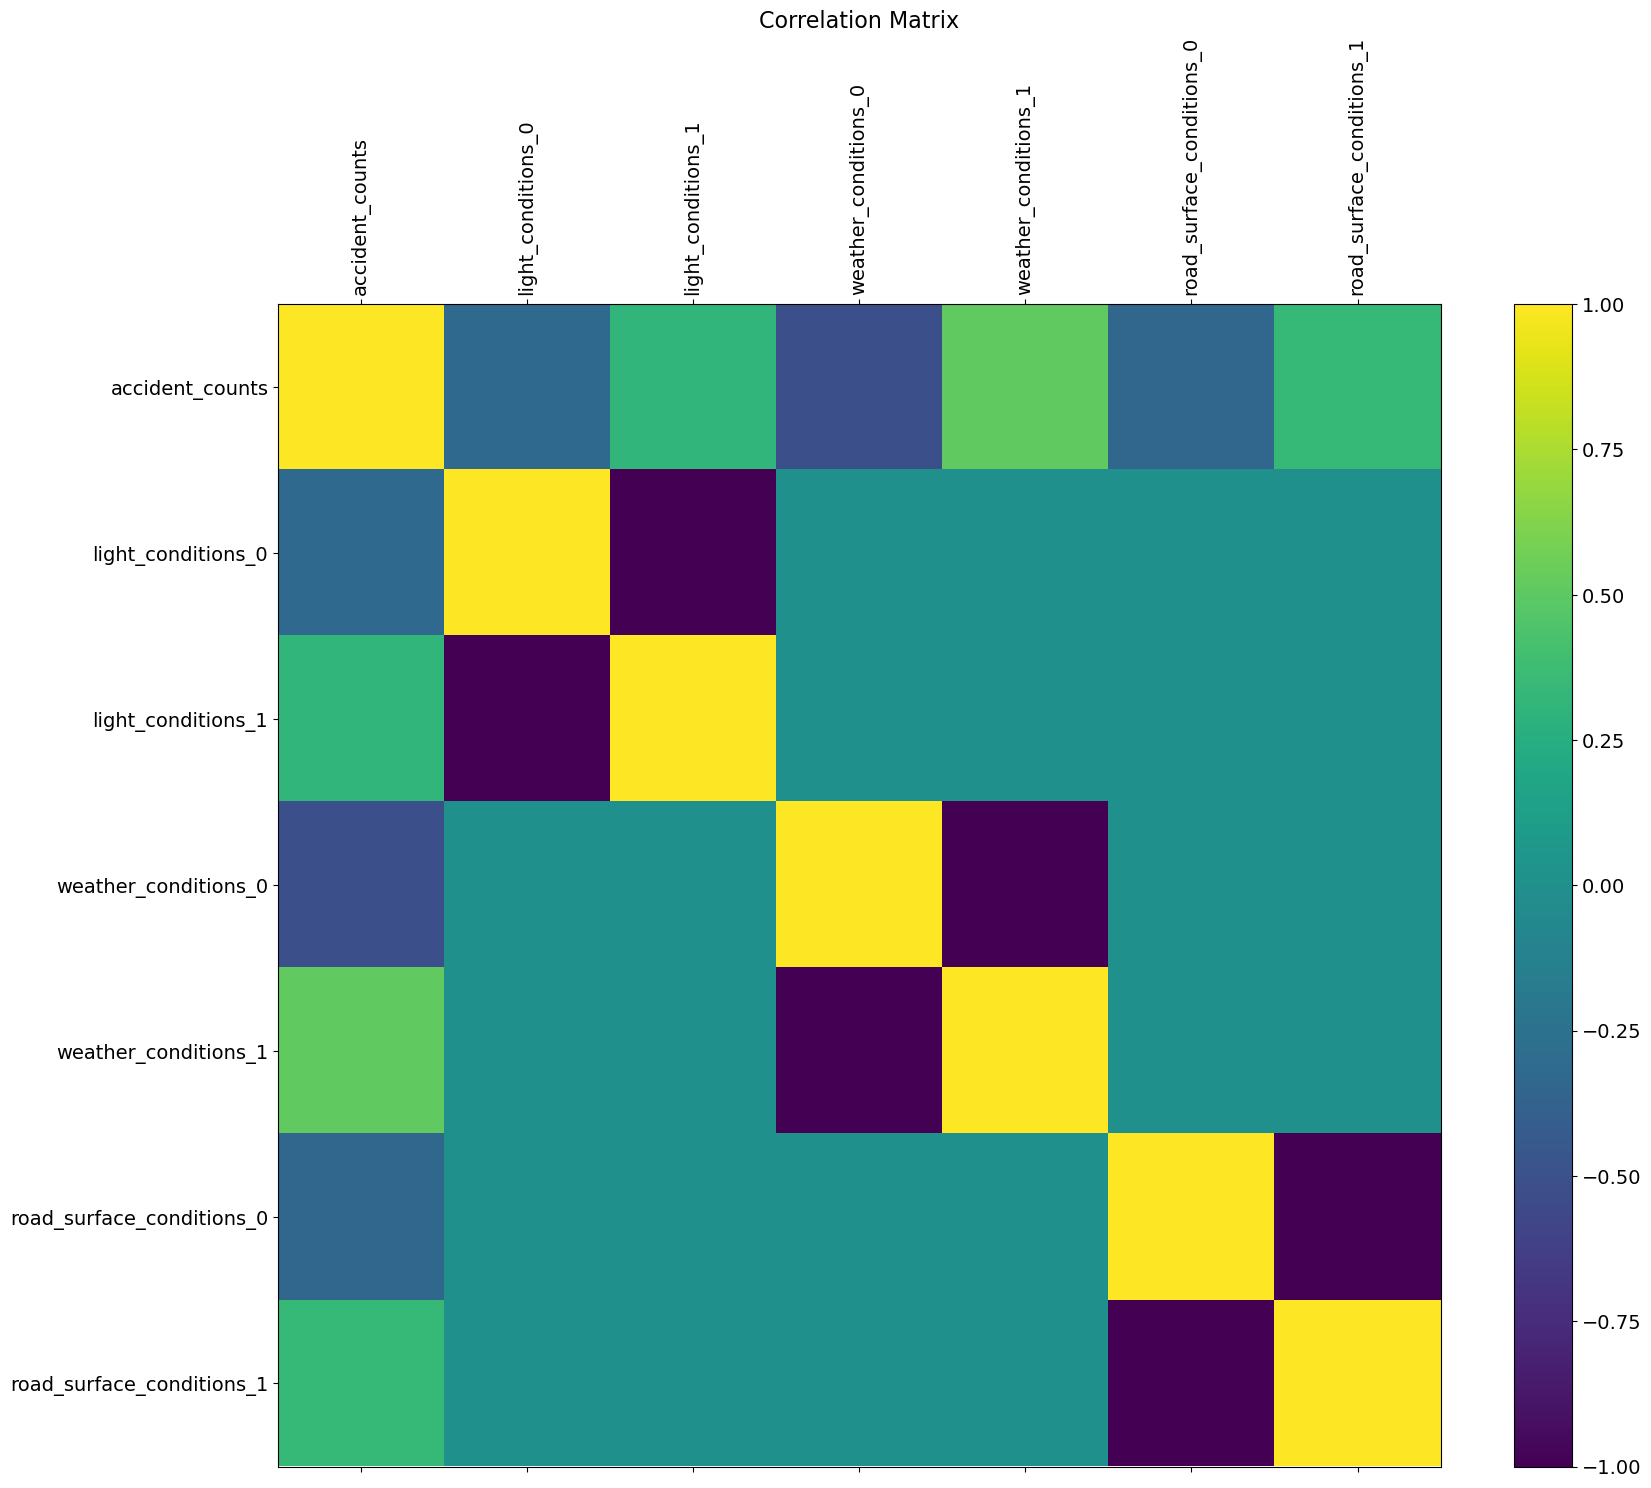

In [100]:
get_cm_by_df(accident_numeric_test)

In [102]:


model_accident_test = sm.OLS(endog=accident_numeric_test[['accident_counts']], exog=sm.add_constant(drop_column_using_vif_(accident_numeric_test.drop('accident_counts', axis=1)))).fit()
model_accident_test.summary()

Dropping: light_conditions_0
Dropping: weather_conditions_0
Dropping: road_surface_conditions_0


d:\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
d:\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
d:\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
d:\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
d:\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
d:\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_sc

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        accident_counts   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     1.231
Date:                Tue, 06 Dec 2022   Prob (F-statistic):              0.408
Time:                        23:46:41   Log-Likelihood:                -93.656
No. Observations:                   8   AIC:                             195.3
Df Residuals:                       4   BIC:                             195.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -1.879e+04   2.94e+04     -0.640      0.557      -1e+05    6.28e+04
light_conditions_1         2.582e+04   2.94e+04      0.879      0.429   -5.58e+04    1.07e+05
weather_conditions_1       4.186e+04   2.94e+04      1.425      0.227   -3.97e+04    1.23e+05
road_surface_conditions_1  2.772e+04   2.94e+04      0.944      0.399   -5.38e+04    1.09e+05
==============================================================================
Omnibus:                        1.247   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.536   Jarque-Bera (JB):                0.764
Skew:                           0.665   Prob(JB):                        0.683
Kurtosis:                       2.277   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Result Output Area

Here are results

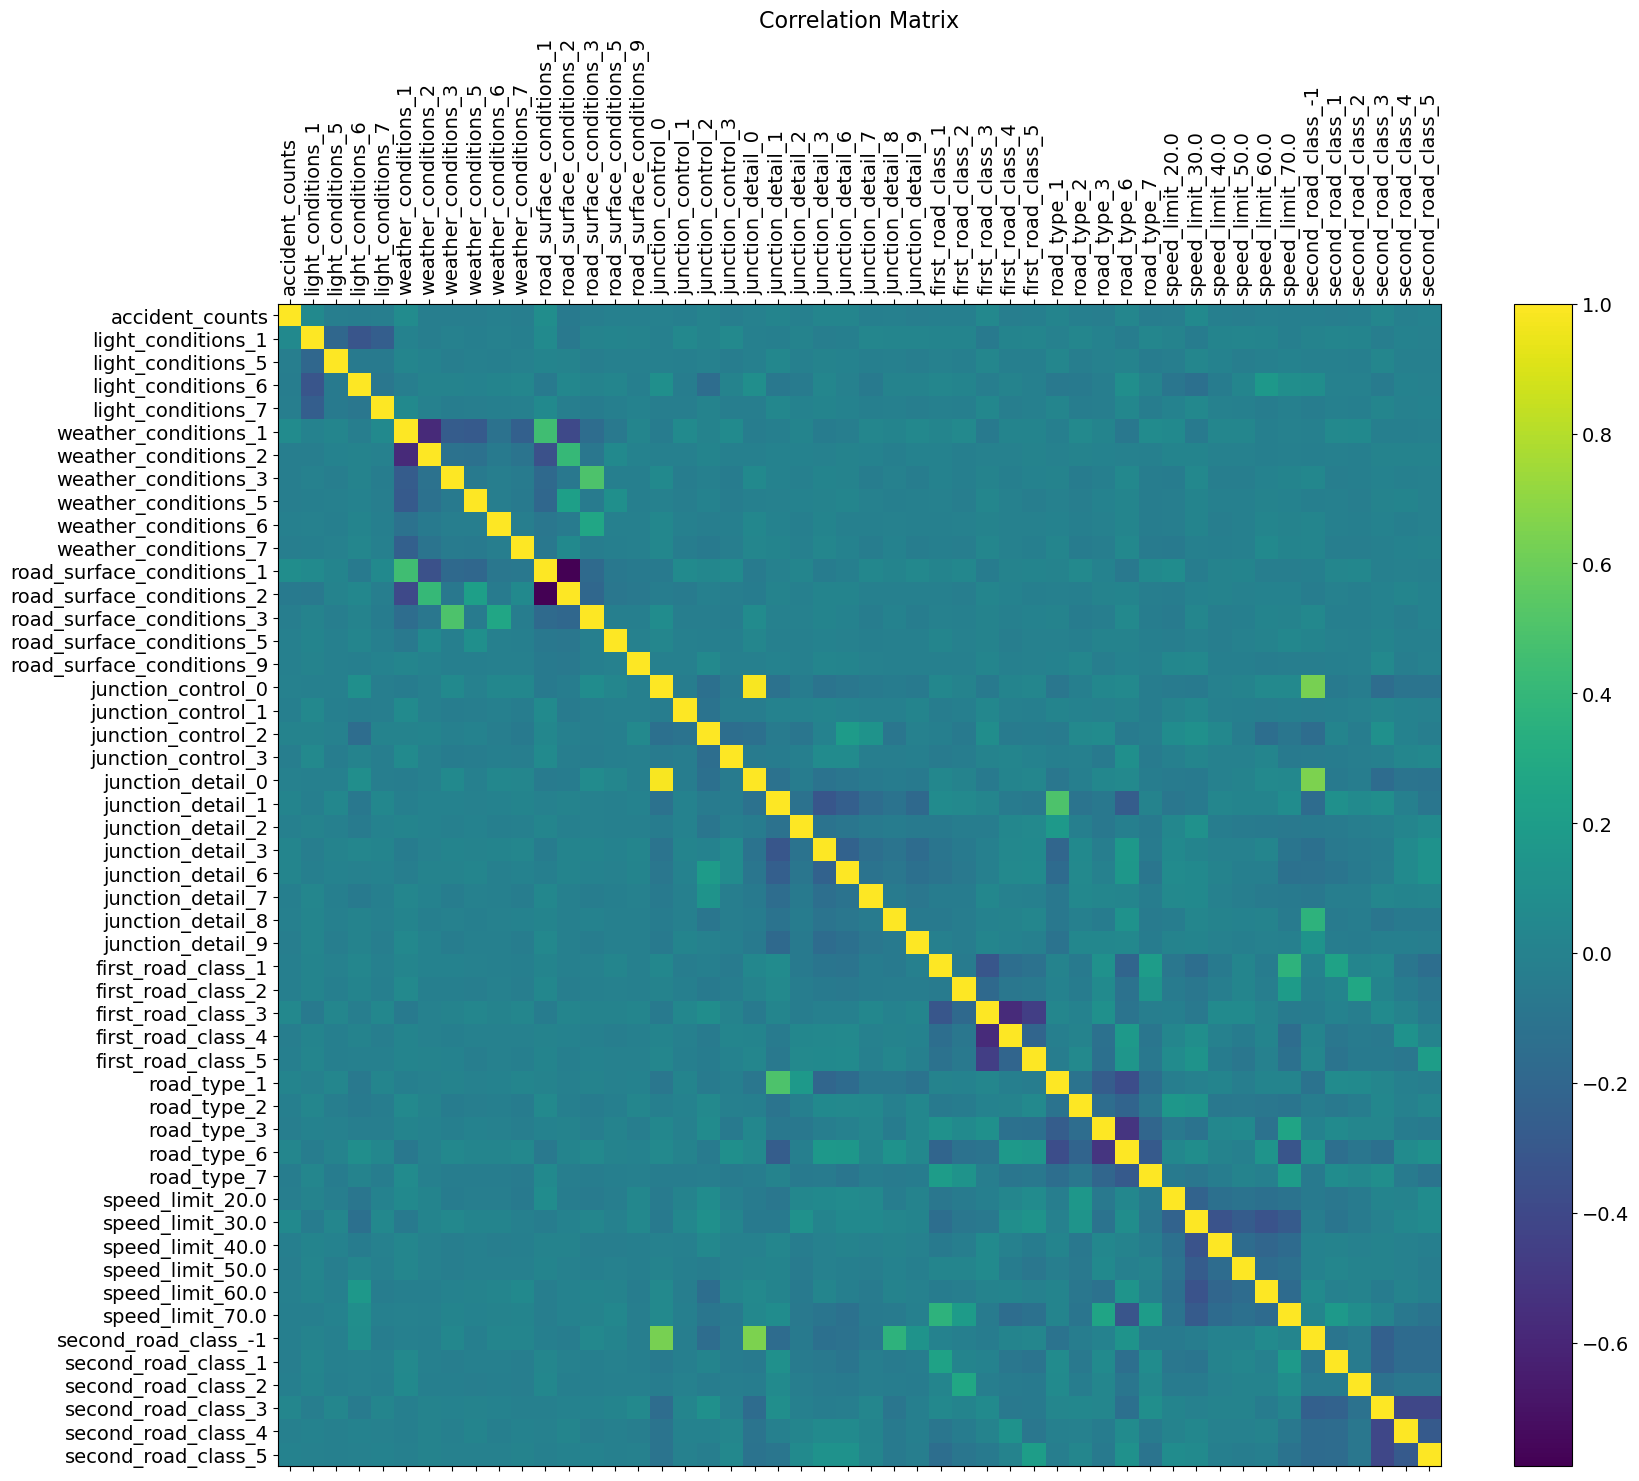

In [56]:
# the corelation matrix

# draw the correalation matrix
get_cm_by_df(accident_final)

In [57]:
# the regression model
model_accident.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        accident_counts   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     16.00
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          3.13e-109
Time:                        22:37:53   Log-Likelihood:                -96175.
No. Observations:               15696   AIC:                         1.924e+05
Df Residuals:                   15654   BIC:                         1.928e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -36.0200      6.920     -5.205      0.000     -49.585     -22.455
light_conditions_1           12.7829      2.045      6.249      0.000       8.774      16.792
light_conditions_5          -22.3584      4.930     -4.536      0.000     -32.021     -12.696
light_conditions_6           -4.9912      3.464     -1.441      0.150     -11.782       1.800
light_conditions_7          -20.3232      3.937     -5.162      0.000     -28.040     -12.607
weather_conditions_1         32.2207      3.614      8.916      0.000      25.137      39.304
weather_conditions_2         24.6040      4.085      6.022      0.000      16.596      32.612
weather_conditions_3         16.3326      5.933      2.753      0.006       4.703      27.962
weather_conditions_5         13.6289      5.188      2.627      0.009       3.460      23.798
weather_conditions_6         13.4486      9.936      1.354      0.176      -6.026      32.923
weather_conditions_7          6.7197      5.586      1.203      0.229      -4.230      17.670
road_surface_conditions_1    33.4329      3.917      8.535      0.000      25.754      41.111
road_surface_conditions_2    15.0259      3.899      3.854      0.000       7.384      22.668
road_surface_conditions_3     2.5744      6.214      0.414      0.679      -9.606      14.755
road_surface_conditions_5    -1.5521     11.060     -0.140      0.888     -23.231      20.127
road_surface_conditions_9   -14.7898     13.651     -1.083      0.279     -41.547      11.967
junction_control_0            4.1176      5.534      0.744      0.457      -6.730      14.965
junction_control_1          -36.4742      5.893     -6.189      0.000     -48.025     -24.923
junction_control_2           -6.0504      2.145     -2.821      0.005     -10.254      -1.847
junction_control_3          -34.1714      4.550     -7.511      0.000     -43.090     -25.253
junction_detail_1             6.5664      3.422      1.919      0.055      -0.141      13.274
junction_detail_2           -14.4872      5.618     -2.579      0.010     -25.498      -3.476
junction_detail_3            13.9560      3.503      3.984      0.000       7.090      20.822
junction_detail_6            14.1850      3.842      3.692      0.000       6.654      21.716
junction_detail_7           -10.9508      4.622     -2.369      0.018     -20.010      -1.891
junction_detail_8           -13.8661      5.728     -2.421      0.015     -25.093      -2.639
junction_detail_9           -12.6526      4.198     -3.014      0.003     -20.882      -4.423
first_road_class_1           -7.9491      3.848     -2.066      0.039     -15.491      -0.407
first_road_class_4          -17.7461      2.376     -7.468      0.000     -22.404     -13.089
first_road_class_5          -21.0396      2.802     -7.509      0.000     -